In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/placed_or_not")

In [ ]:
import pandas as pd
# df=pd.read_csv("/content/drive/MyDrive/placed_or_not/Placement_BeginnerTask01.csv")
df=pd.read_csv("placements.csv")

In [3]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [6]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


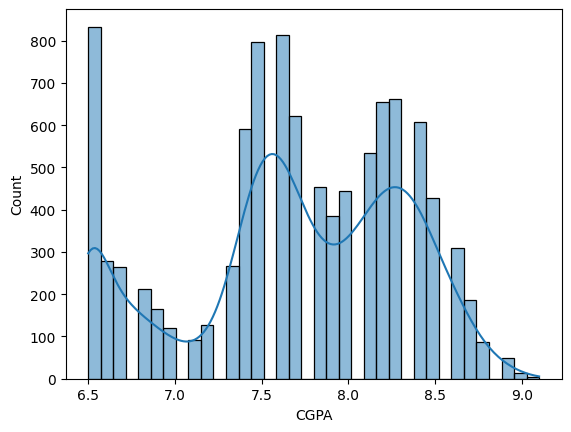

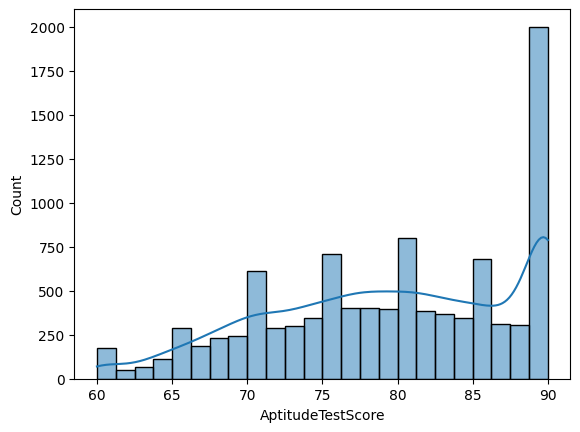

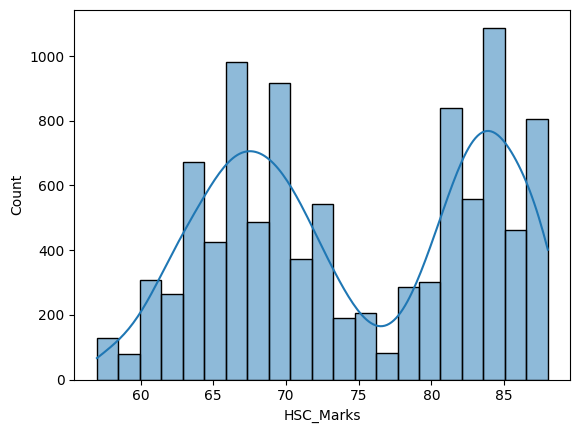

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CGPA'], kde=True)
plt.show()

sns.histplot(df['AptitudeTestScore'], kde=True)
plt.show()

sns.histplot(df['HSC_Marks'], kde=True)
plt.show()

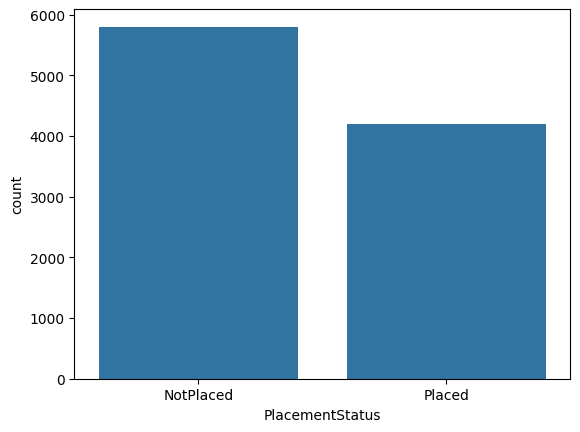

In [8]:
sns.countplot(x='PlacementStatus', data=df)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()

# Create encoders
le_activity = LabelEncoder()
le_training = LabelEncoder()
le_status   = LabelEncoder()

# Encode columns
df['ExtracurricularActivities'] = le_activity.fit_transform(df['ExtracurricularActivities'])
df['PlacementTraining'] = le_training.fit_transform(df['PlacementTraining'])
df['PlacementStatus'] = le_status.fit_transform(df['PlacementStatus'])

# Split into inputs/target
inputs = df.drop(['PlacementStatus', 'StudentID'], axis=1)
target = df['PlacementStatus']


<Axes: >

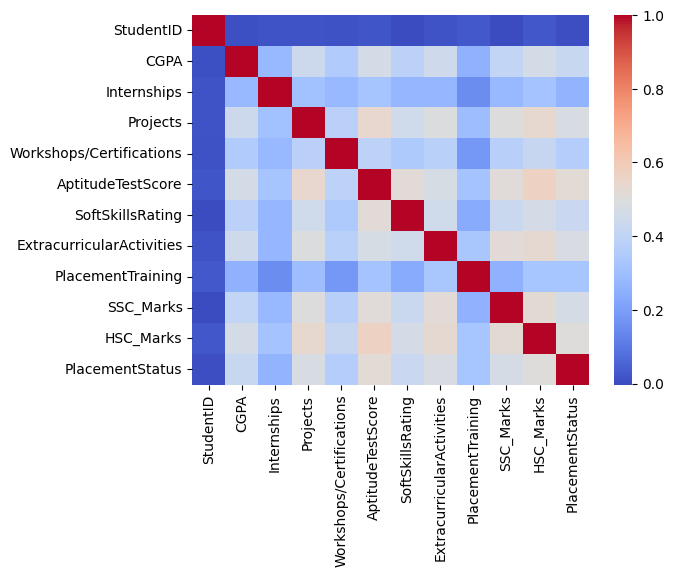

In [10]:
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")

In [11]:
inputs.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88


In [12]:
target.head()

,PlacementStatus
0,0
1,1
2,0
3,1
4,1


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    inputs,
    target,
    test_size=0.2,
    random_state=42
)

In [14]:
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200, # number of trees
    max_depth=4, # max depth of the decision tree classifier
    learning_rate=0.1,
    subsample=0.9, # Fraction of training rows used to build each tree. reduces overfitting
    colsample_bytree=0.9,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.787

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[965, 207],
       [219, 609]])

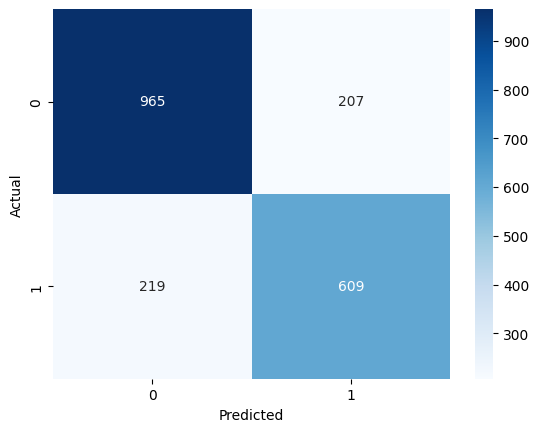

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<Figure size 1000x600 with 0 Axes>

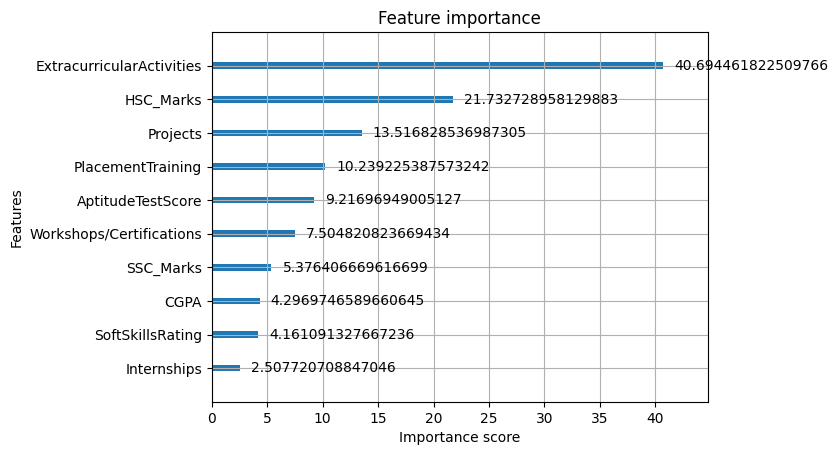

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_importance(model, importance_type='gain')
plt.show()
# features ranked by how much they contributed to reducing loss.

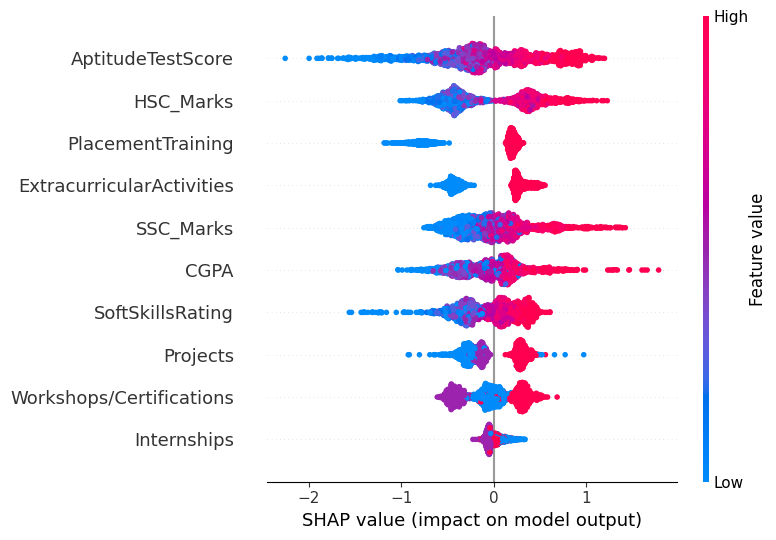

In [21]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [22]:
# import joblib
# joblib.dump(model, "/content/drive/MyDrive/placed_or_not/placement_model.pkl")
# joblib.dump(le_activity, "/content/drive/MyDrive/placed_or_not/le_activity.pkl")
# joblib.dump(le_training, "/content/drive/MyDrive/placed_or_not/le_training.pkl")
# joblib.dump(le_status, "/content/drive/MyDrive/placed_or_not/le_status.pkl")


['/content/drive/MyDrive/placed_or_not/le_status.pkl']

In [23]:
# loaded_model = joblib.load("/content/drive/MyDrive/placed_or_not/placement_model.pkl")
# loaded_le_activity = joblib.load("/content/drive/MyDrive/placed_or_not/le_activity.pkl")
# loaded_le_training = joblib.load("/content/drive/MyDrive/placed_or_not/le_training.pkl")
# loaded_le_status = joblib.load("/content/drive/MyDrive/placed_or_not/le_status.pkl")

In [24]:
# from sklearn.metrics import accuracy_score
# y_pred2=loaded_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred2)
# accuracy
# # correctly loaded

0.787